CODE TO EXPLORE AND MAYBE LOOK AT TESTING ACCURACY OF INITIAL DATA FROM SNOWFLAKE MARKETPLACE (FLIPSIDE CRYPTO) FOR POLYGON ONCHAIN DATA

In [38]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Tuple, List
from sklearn.preprocessing import StandardScaler
import os

# Load the dataset
data = pd.read_csv('../new_raw_data.csv')



In [39]:
#EDA of the dataset
for col in data.columns:
    print(f"\n--- Descriptive statistics for column: {col} ---")
    print(data[col].describe())


--- Descriptive statistics for column: WALLET ---
count                                          50000
unique                                         50000
top       0x2aee25444ecc1b1895d6fcbad5c260e6df2f6763
freq                                               1
Name: WALLET, dtype: object

--- Descriptive statistics for column: TX_PER_MONTH ---
count     50000.000000
mean         34.343490
std        1575.510914
min           0.166667
25%           0.500000
50%           3.166667
75%          12.166667
max      294188.333333
Name: TX_PER_MONTH, dtype: float64

--- Descriptive statistics for column: TOKEN_DIVERSITY ---
count    50000.000000
mean         2.352440
std         10.635872
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max       1439.000000
Name: TOKEN_DIVERSITY, dtype: float64

--- Descriptive statistics for column: PROTOCOL_DIVERSITY ---
count     50000.000000
mean         10.525620
std         616.194882
min           0.000000
25% 

In [40]:
'''# Transform dataset using preprocessing functions from source_code_package
import sys
sys.path.append('../source_code_package')

# Reload the module to get the latest version
import importlib
if 'data.preprocess_cluster' in sys.modules:
    importlib.reload(sys.modules['data.preprocess_cluster'])

from data.preprocess_cluster import preprocess_for_clustering

# Apply log transformation and scaling to the data
print("Applying preprocessing transformations...")
data_transformed, preprocessing_info = preprocess_for_clustering(
    data_path='../data/raw_data/initial_raw_data_polygon.csv',
    apply_log_transform=True,
    apply_scaling=True
)

print(f"\nOriginal data shape: {data.shape}")
print(f"Transformed data shape: {data_transformed.shape}")
print(f"\nPreprocessing steps applied: {preprocessing_info['steps_applied']}")
print(f"Log transformed columns: {len(preprocessing_info['log_transformed_columns'])}")
print(f"Scaled columns: {len(preprocessing_info['scaled_columns'])}")

# Update the data variable to use transformed data for plotting
data = data_transformed.copy()'''

'# Transform dataset using preprocessing functions from source_code_package\nimport sys\nsys.path.append(\'../source_code_package\')\n\n# Reload the module to get the latest version\nimport importlib\nif \'data.preprocess_cluster\' in sys.modules:\n    importlib.reload(sys.modules[\'data.preprocess_cluster\'])\n\nfrom data.preprocess_cluster import preprocess_for_clustering\n\n# Apply log transformation and scaling to the data\nprint("Applying preprocessing transformations...")\ndata_transformed, preprocessing_info = preprocess_for_clustering(\n    data_path=\'../data/raw_data/initial_raw_data_polygon.csv\',\n    apply_log_transform=True,\n    apply_scaling=True\n)\n\nprint(f"\nOriginal data shape: {data.shape}")\nprint(f"Transformed data shape: {data_transformed.shape}")\nprint(f"\nPreprocessing steps applied: {preprocessing_info[\'steps_applied\']}")\nprint(f"Log transformed columns: {len(preprocessing_info[\'log_transformed_columns\'])}")\nprint(f"Scaled columns: {len(preprocessing_

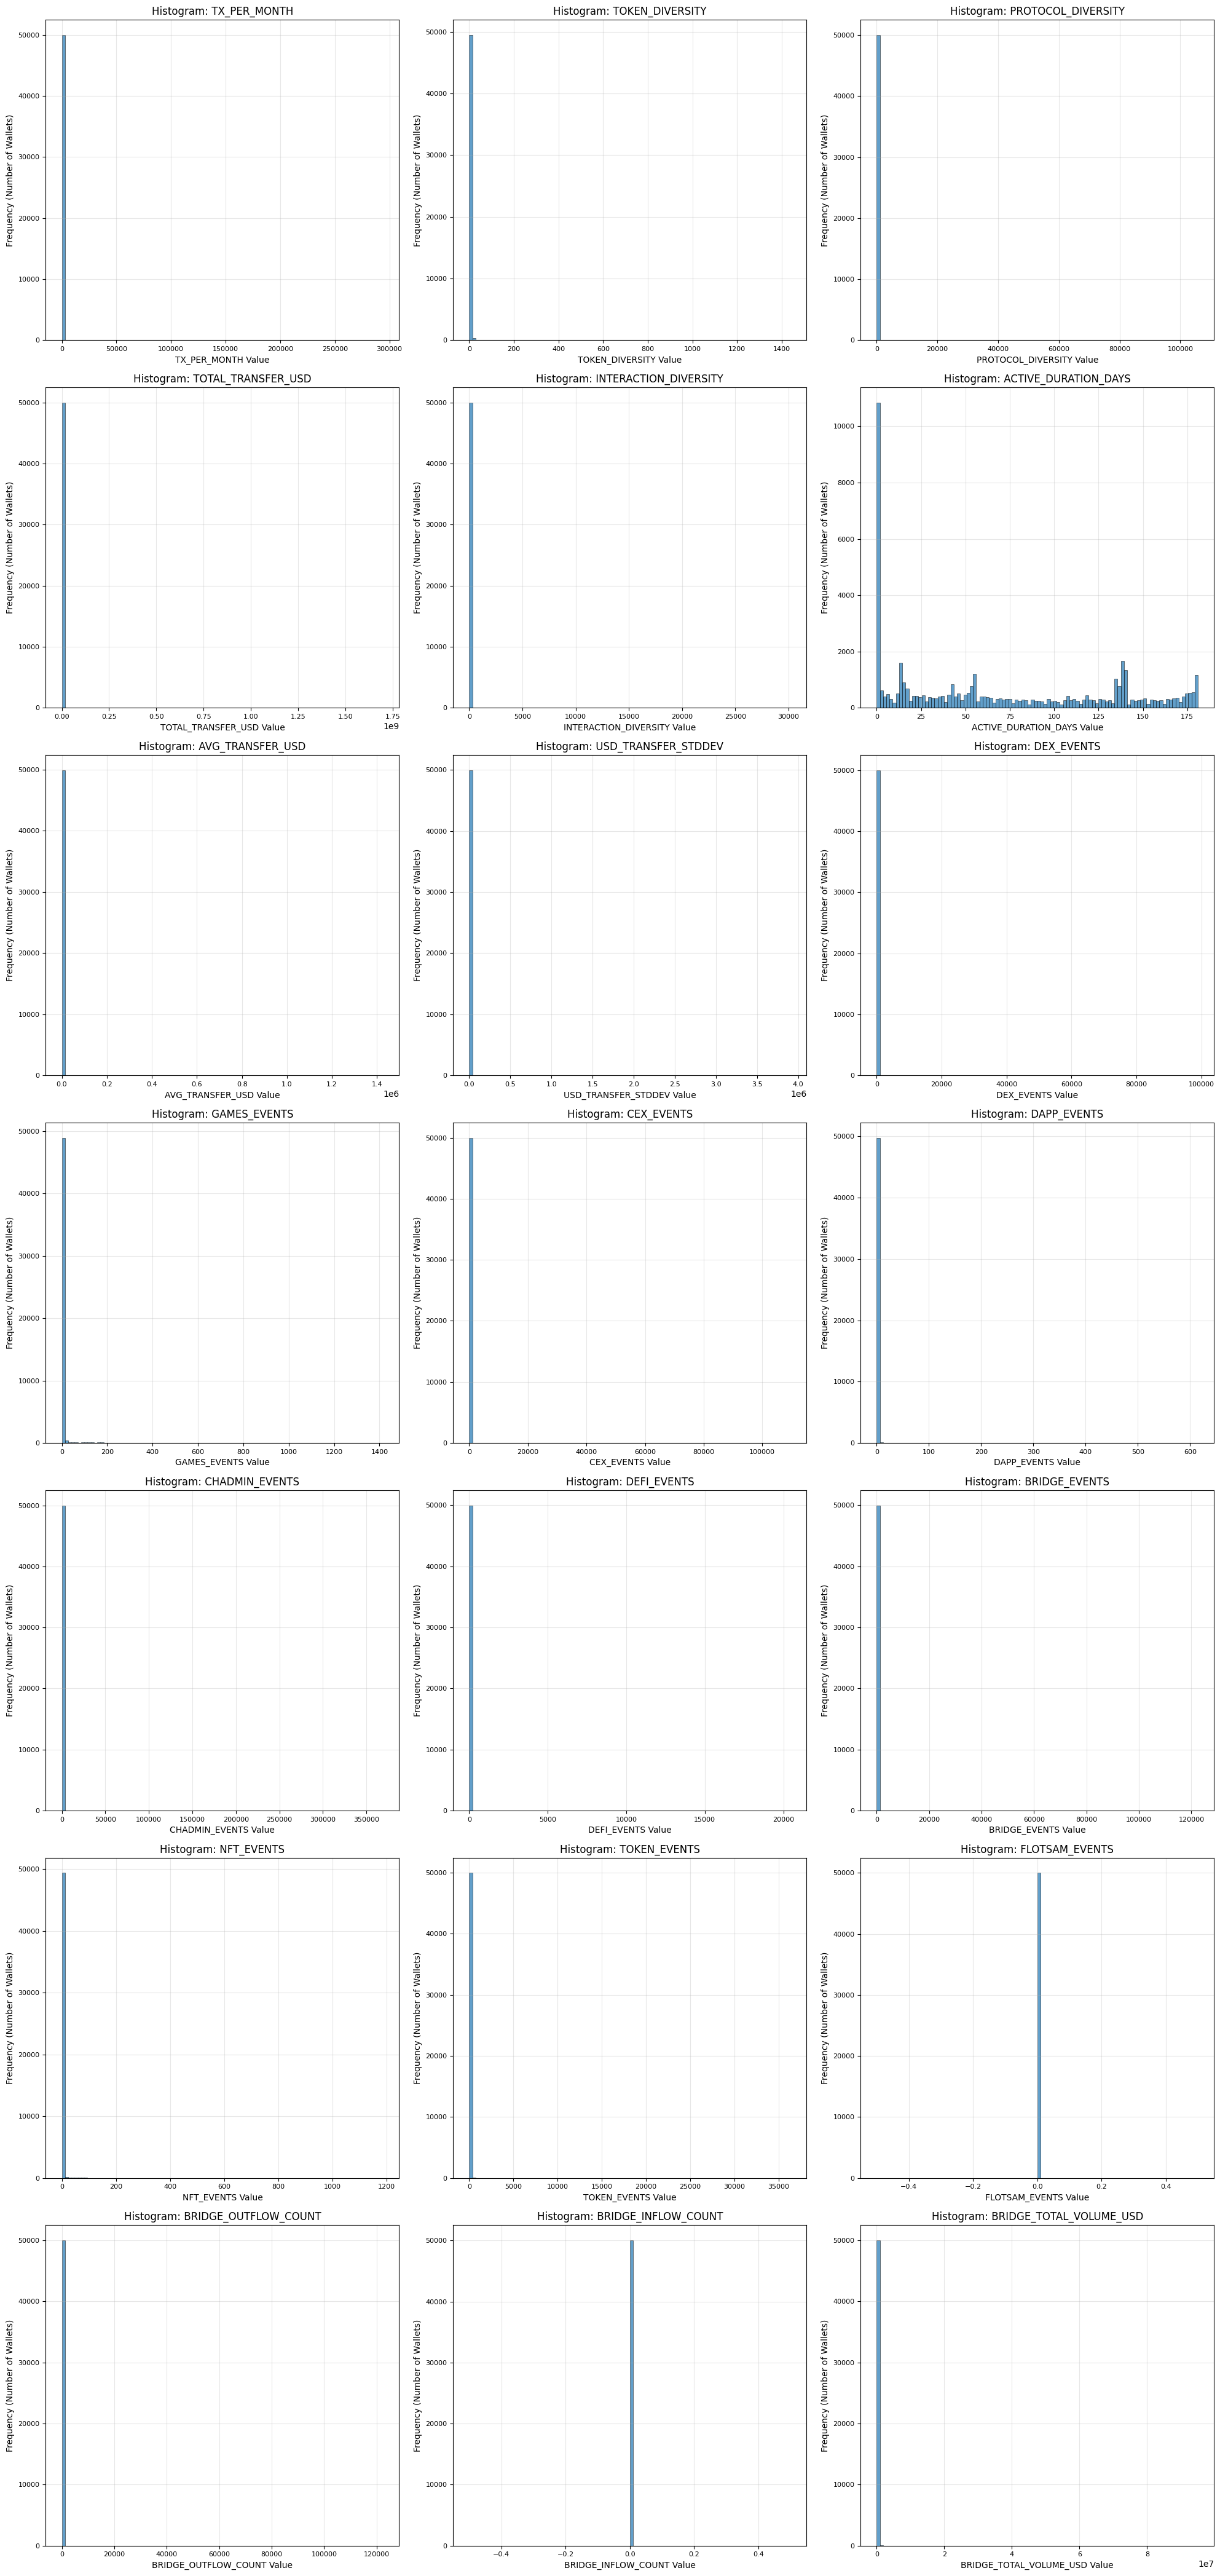

In [41]:
# Create histograms for all numeric features
# Each histogram shows the distribution of values for that feature

# Get all numeric columns (excluding WALLET column)
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

# Calculate number of subplots needed
n_cols = 3  # Number of columns in subplot grid
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)  # Ensure axes is 2D array
elif n_cols == 1:
    axes = axes.reshape(-1, 1)

# Flatten axes for easier iteration if needed
axes_flat = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]

for i, column in enumerate(numeric_columns):
    if i < len(axes_flat):
        ax = axes_flat[i]
        
        # Create histogram
        ax.hist(data[column], bins=100, alpha=0.7, edgecolor='black', linewidth=0.5)
        ax.set_xlabel(f'{column} Value')
        ax.set_ylabel('Frequency (Number of Wallets)')
        ax.set_title(f'Histogram: {column}')
        ax.grid(True, alpha=0.3)
        
        # Add some basic formatting
        ax.tick_params(axis='both', which='major', labelsize=8)

# Remove empty subplots
for i in range(len(numeric_columns), len(axes_flat)):
    axes_flat[i].remove()

plt.tight_layout()
plt.show()

In [42]:
# Let's examine the data structure and get better insights
print("Dataset shape:", data.shape)
print("\nColumn names and types:")
print(data.dtypes)
print("\nFirst few rows:")
print(data.head())
print("\nBasic statistics:")
print(data.describe())
print("\nMissing values:")
print(data.isnull().sum())
print("\nColumn names:")
print(data.columns.tolist())

Dataset shape: (50000, 22)

Column names and types:
WALLET                      object
TX_PER_MONTH               float64
TOKEN_DIVERSITY              int64
PROTOCOL_DIVERSITY           int64
TOTAL_TRANSFER_USD         float64
INTERACTION_DIVERSITY        int64
ACTIVE_DURATION_DAYS         int64
AVG_TRANSFER_USD           float64
USD_TRANSFER_STDDEV        float64
DEX_EVENTS                   int64
GAMES_EVENTS                 int64
CEX_EVENTS                   int64
DAPP_EVENTS                  int64
CHADMIN_EVENTS               int64
DEFI_EVENTS                  int64
BRIDGE_EVENTS                int64
NFT_EVENTS                   int64
TOKEN_EVENTS                 int64
FLOTSAM_EVENTS               int64
BRIDGE_OUTFLOW_COUNT         int64
BRIDGE_INFLOW_COUNT          int64
BRIDGE_TOTAL_VOLUME_USD    float64
dtype: object

First few rows:
                                       WALLET  TX_PER_MONTH  TOKEN_DIVERSITY  \
0  0x2aee25444ecc1b1895d6fcbad5c260e6df2f6763          57.0        

Analyzing 21 numeric features
Features: ['TX_PER_MONTH', 'TOKEN_DIVERSITY', 'PROTOCOL_DIVERSITY', 'TOTAL_TRANSFER_USD', 'INTERACTION_DIVERSITY', 'ACTIVE_DURATION_DAYS', 'AVG_TRANSFER_USD', 'USD_TRANSFER_STDDEV', 'DEX_EVENTS', 'GAMES_EVENTS', 'CEX_EVENTS', 'DAPP_EVENTS', 'CHADMIN_EVENTS', 'DEFI_EVENTS', 'BRIDGE_EVENTS', 'NFT_EVENTS', 'TOKEN_EVENTS', 'FLOTSAM_EVENTS', 'BRIDGE_OUTFLOW_COUNT', 'BRIDGE_INFLOW_COUNT', 'BRIDGE_TOTAL_VOLUME_USD']


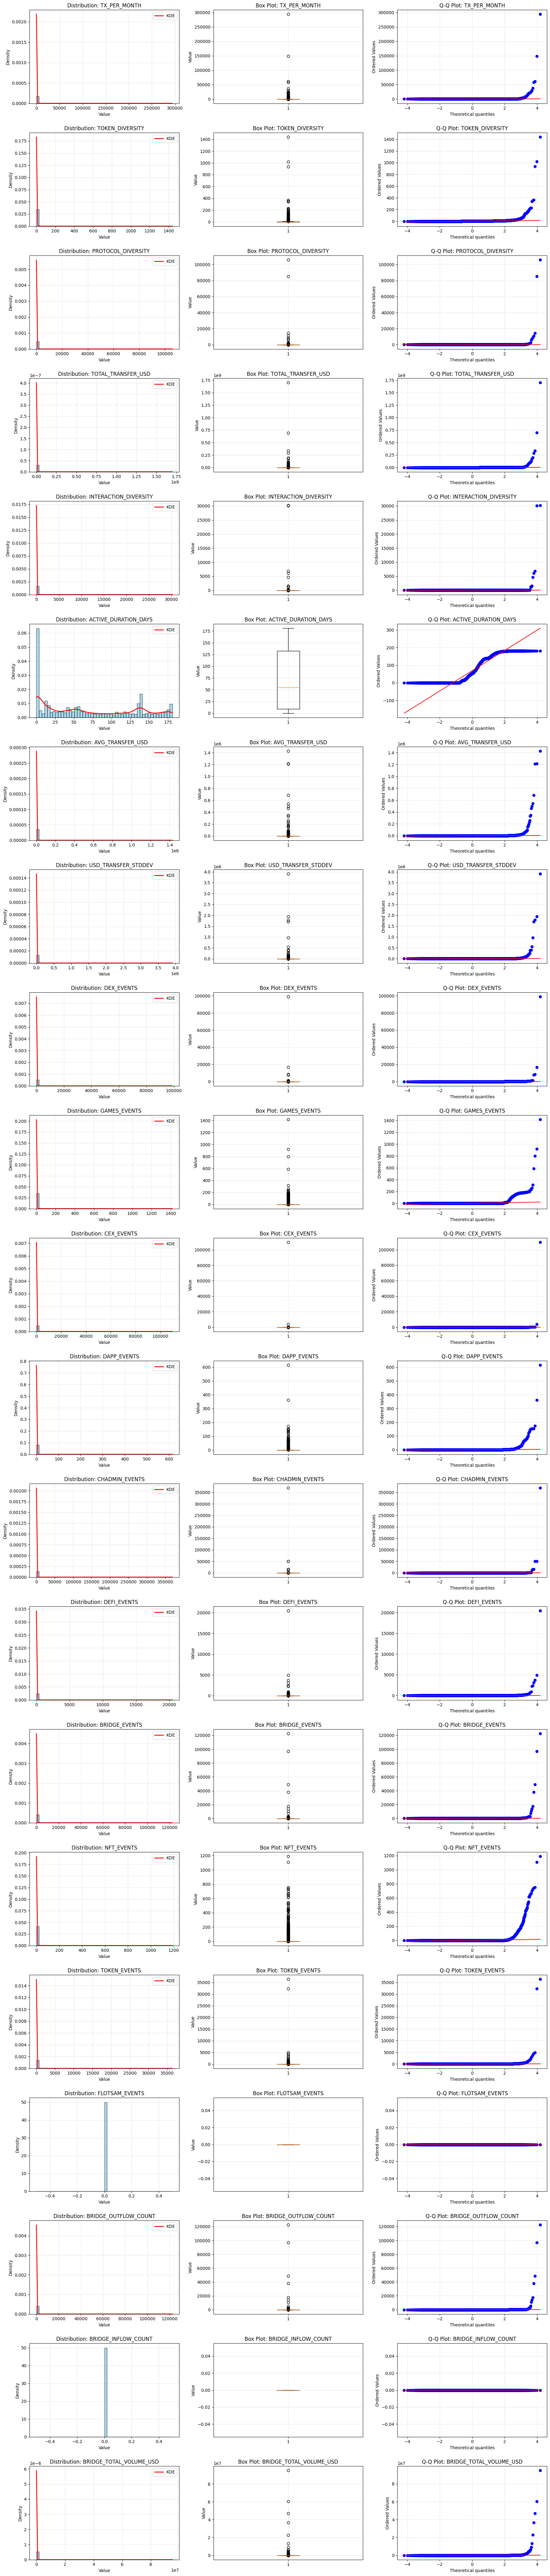

In [43]:
# IMPROVED DATA VISUALIZATION FOR BETTER INSIGHTS
# Let's create multiple types of plots to better understand the data distribution

# Get numeric columns (excluding WALLET if it exists)
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
if 'WALLET' in numeric_columns:
    numeric_columns.remove('WALLET')

print(f"Analyzing {len(numeric_columns)} numeric features")
print("Features:", numeric_columns)

# 1. DISTRIBUTION ANALYSIS WITH BOX PLOTS AND HISTOGRAMS
fig, axes = plt.subplots(len(numeric_columns), 3, figsize=(18, 4*len(numeric_columns)))
if len(numeric_columns) == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(numeric_columns):
    # Histogram with KDE
    axes[i, 0].hist(data[column], bins=50, alpha=0.7, density=True, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'Distribution: {column}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Density')
    axes[i, 0].grid(True, alpha=0.3)
    
    # Add KDE line
    from scipy import stats
    if not data[column].isnull().all() and data[column].std() > 0:
        kde_x = np.linspace(data[column].min(), data[column].max(), 100)
        kde = stats.gaussian_kde(data[column].dropna())
        axes[i, 0].plot(kde_x, kde(kde_x), 'r-', linewidth=2, label='KDE')
        axes[i, 0].legend()
    
    # Box plot
    axes[i, 1].boxplot(data[column].dropna(), vert=True)
    axes[i, 1].set_title(f'Box Plot: {column}')
    axes[i, 1].set_ylabel('Value')
    axes[i, 1].grid(True, alpha=0.3)
    
    # Q-Q plot for normality assessment
    stats.probplot(data[column].dropna(), dist="norm", plot=axes[i, 2])
    axes[i, 2].set_title(f'Q-Q Plot: {column}')
    axes[i, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()